# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

## Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

## Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

## About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

### You are provided with following 2 files:## Business Use Case

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.  
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.  

### Dataset Attributes

Here is the description of all the variables:  
•	Variable: Definition  
•	ID: Unique client ID  
•	age: Age of the client  
•	job: Type of job  
•	marital: Marital status of the client  
•	education: Education level  
•	default: Credit in default.  
•	housing: Housing loan  
•	loan: Personal loan  
•	contact: Type of communication  
•	month: Contact month  
•	day_of_week: Day of week of contact  
•	duration: Contact duration  
•	campaign: number of contacts performed during this campaign to the client  
•	pdays: number of days that passed by after the client was last contacted  
•	previous: number of contacts performed before this campaign  
•	poutcome: outcome of the previous marketing campaign  

### Output variable (desired target):

Subscribed (target): has the client subscribed a term deposit? (YES/NO)

## Importing Libraries & Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import lazypredict
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [7]:
df.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [45]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [46]:
df_test.head()

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown

## Understanding the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [ ]:
df.describe()

ID      age   balance      day  duration  campaign    pdays  \
count 31647.00 31647.00  31647.00 31647.00  31647.00  31647.00 31647.00   
mean  22563.97    40.96   1363.89    15.84    258.11      2.77    39.58   
std   13075.94    10.63   3028.30     8.34    257.12      3.11    99.32   
min       2.00    18.00  -8019.00     1.00      0.00      1.00    -1.00   
25%   11218.00    33.00     73.00     8.00    104.00      1.00    -1.00   
50%   22519.00    39.00    450.00    16.00    180.00      2.00    -1.00   
75%   33879.50    48.00   1431.00    21.00    318.50      3.00    -1.00   
max   45211.00    95.00 102127.00    31.00   4918.00     63.00   871.00   

       previous  
count  31647.00  
mean       0.57  
std        2.42  
min        0.00  
25%        0.00  
50%        0.00  
75%        0.00  
max      275.00

In [ ]:
df.isnull().any()

ID            False
age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
subscribed    False
dtype: bool

In [10]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

## Preparation of the Data

In [11]:
df = df.drop(['ID'], axis=1)

In [ ]:
df.head()

age         job   marital  education default  balance housing loan  \
0   56      admin.   married    unknown      no     1933      no   no   
1   31     unknown   married  secondary      no        3      no   no   
2   27    services   married  secondary      no      891     yes   no   
3   57  management  divorced   tertiary      no     3287      no   no   
4   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

## Understanding Features

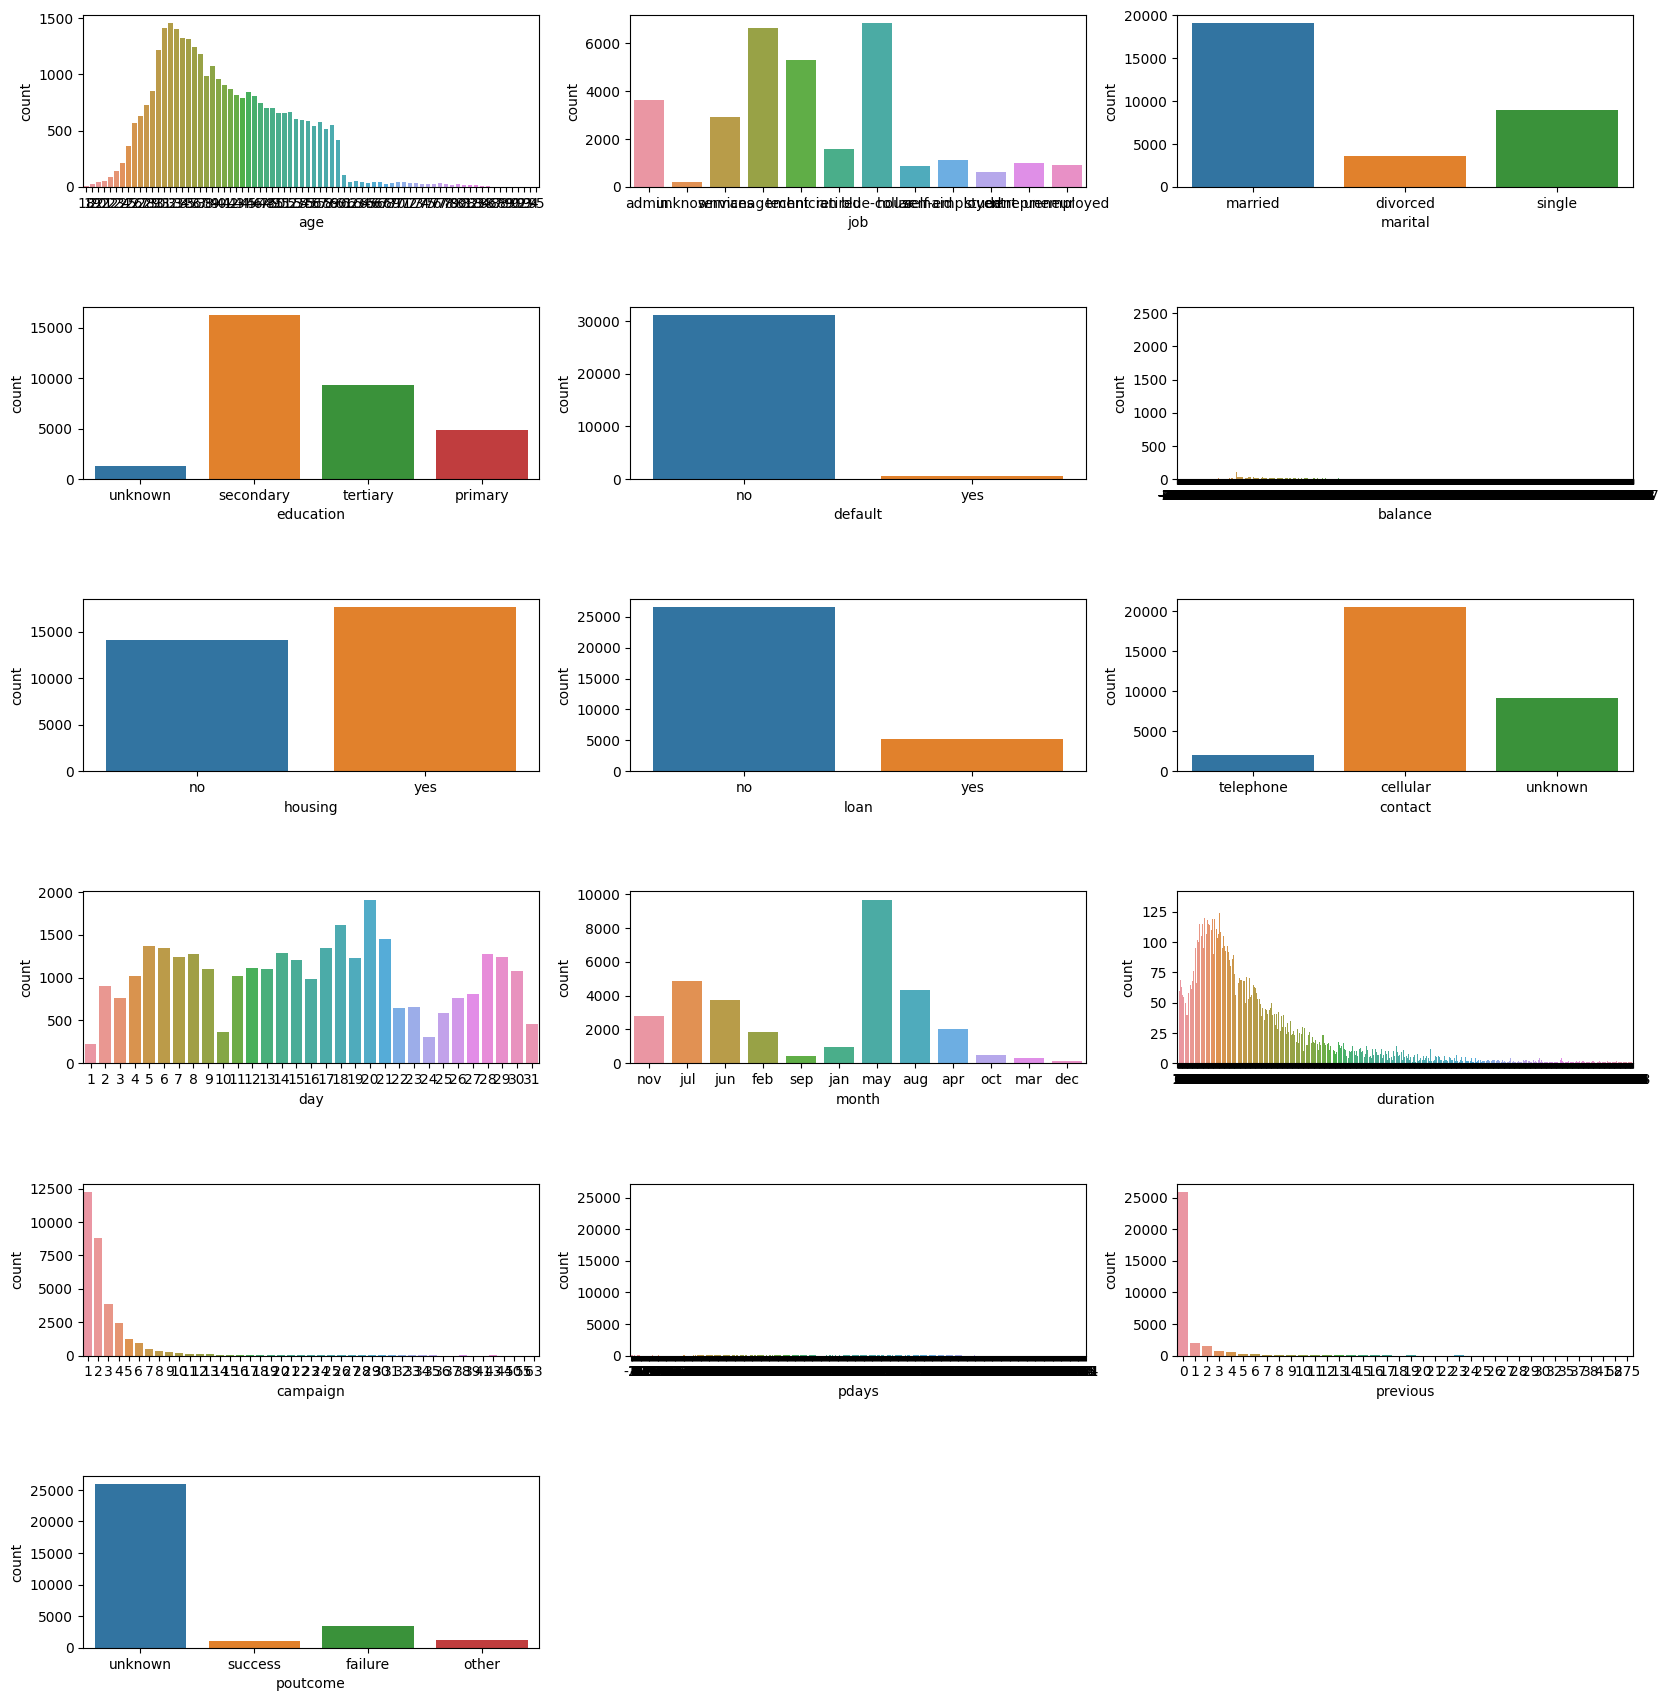

In [ ]:
plt.figure(figsize=(20, 25))
p = 1
for col in df.columns:
    if p <= 16:
        plt.subplot(7, 3, p)
        sns.countplot(x=col, data=df)
        p += 1
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

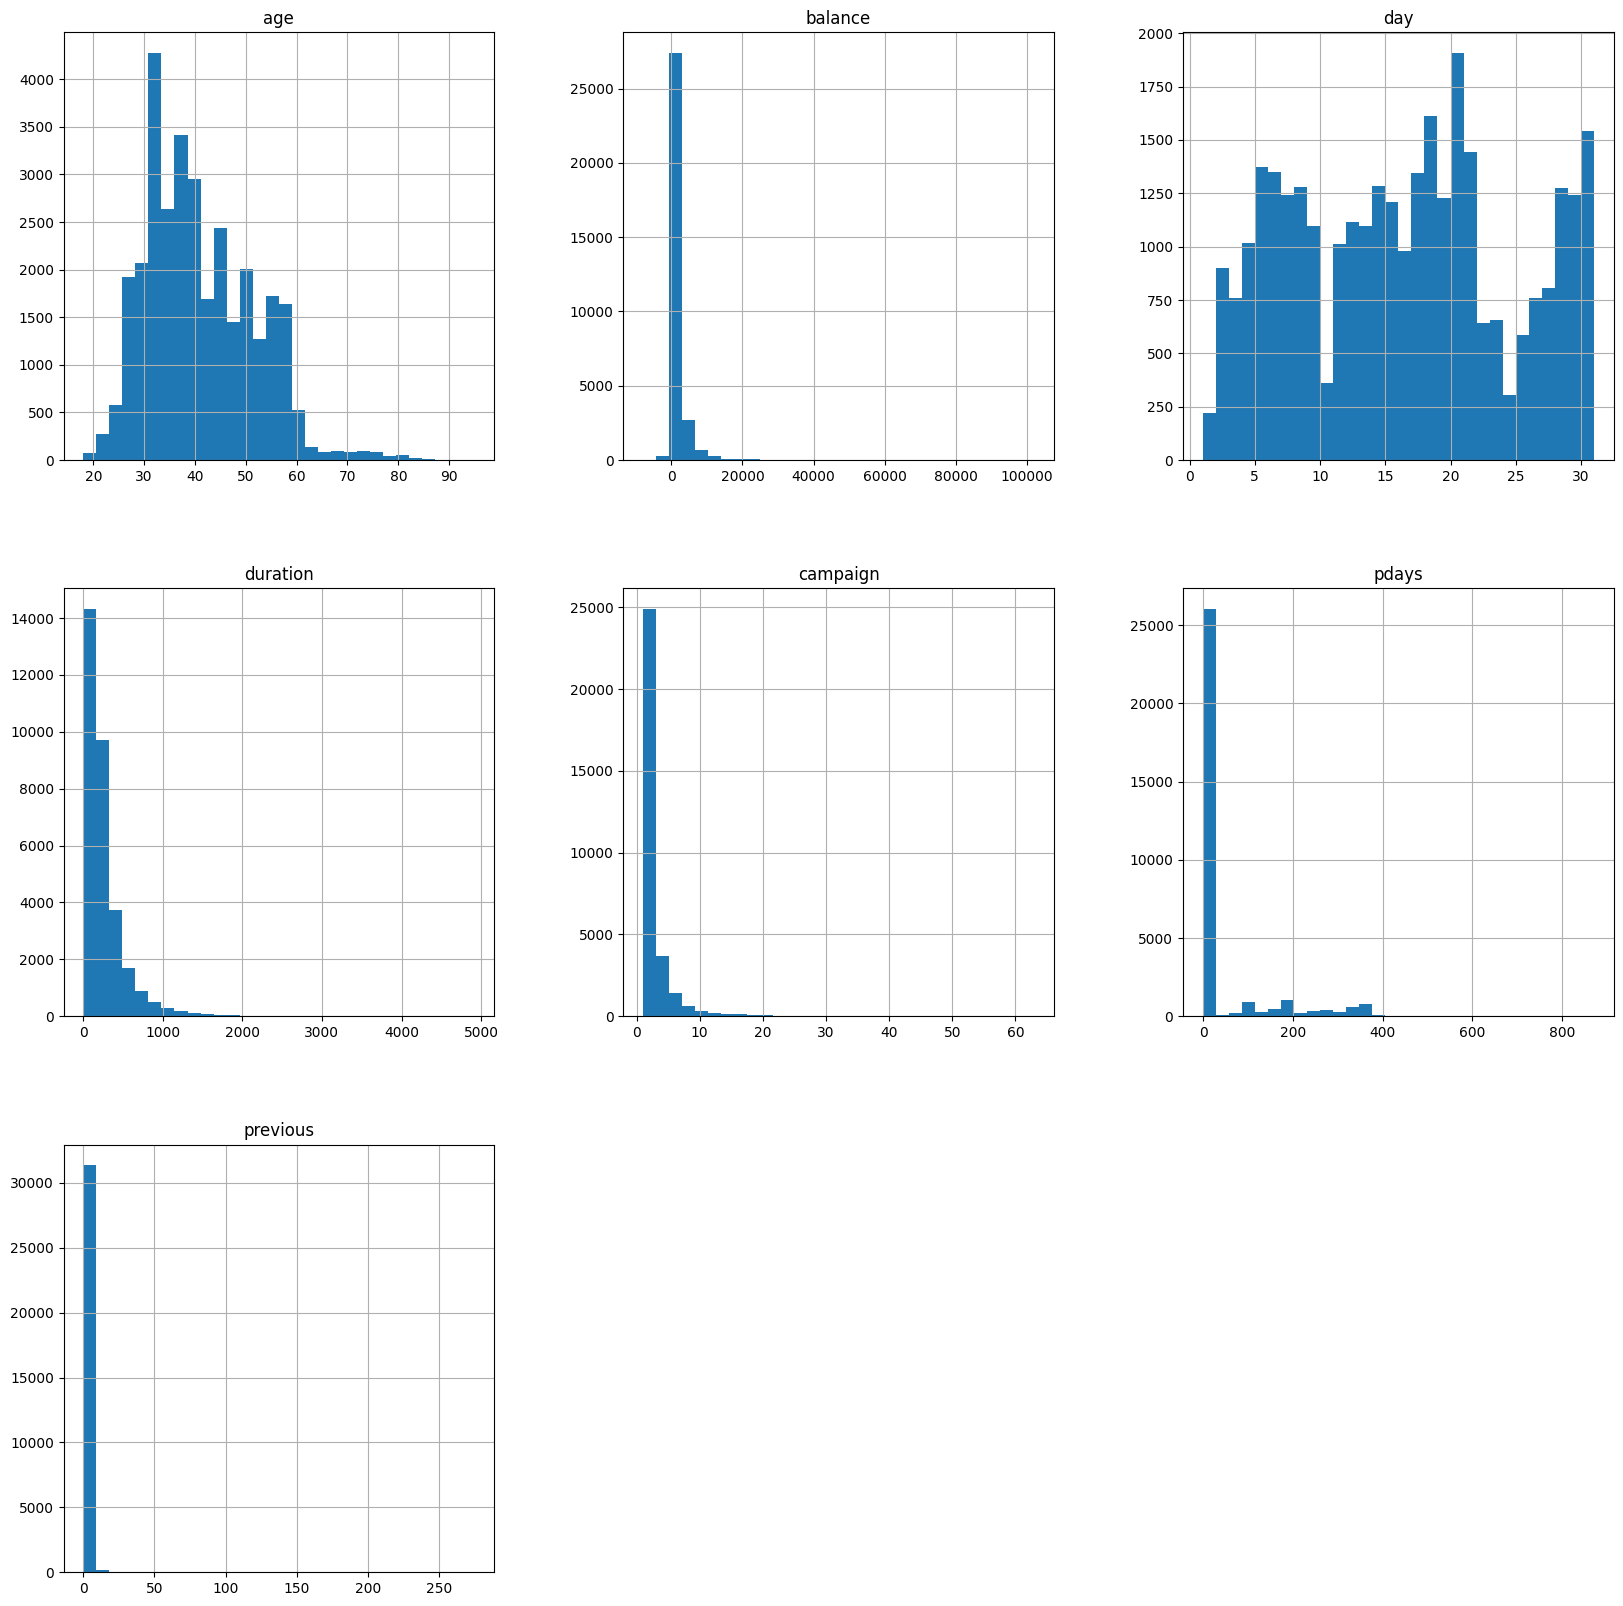

In [ ]:
df.hist(bins=30,figsize=(20,20));

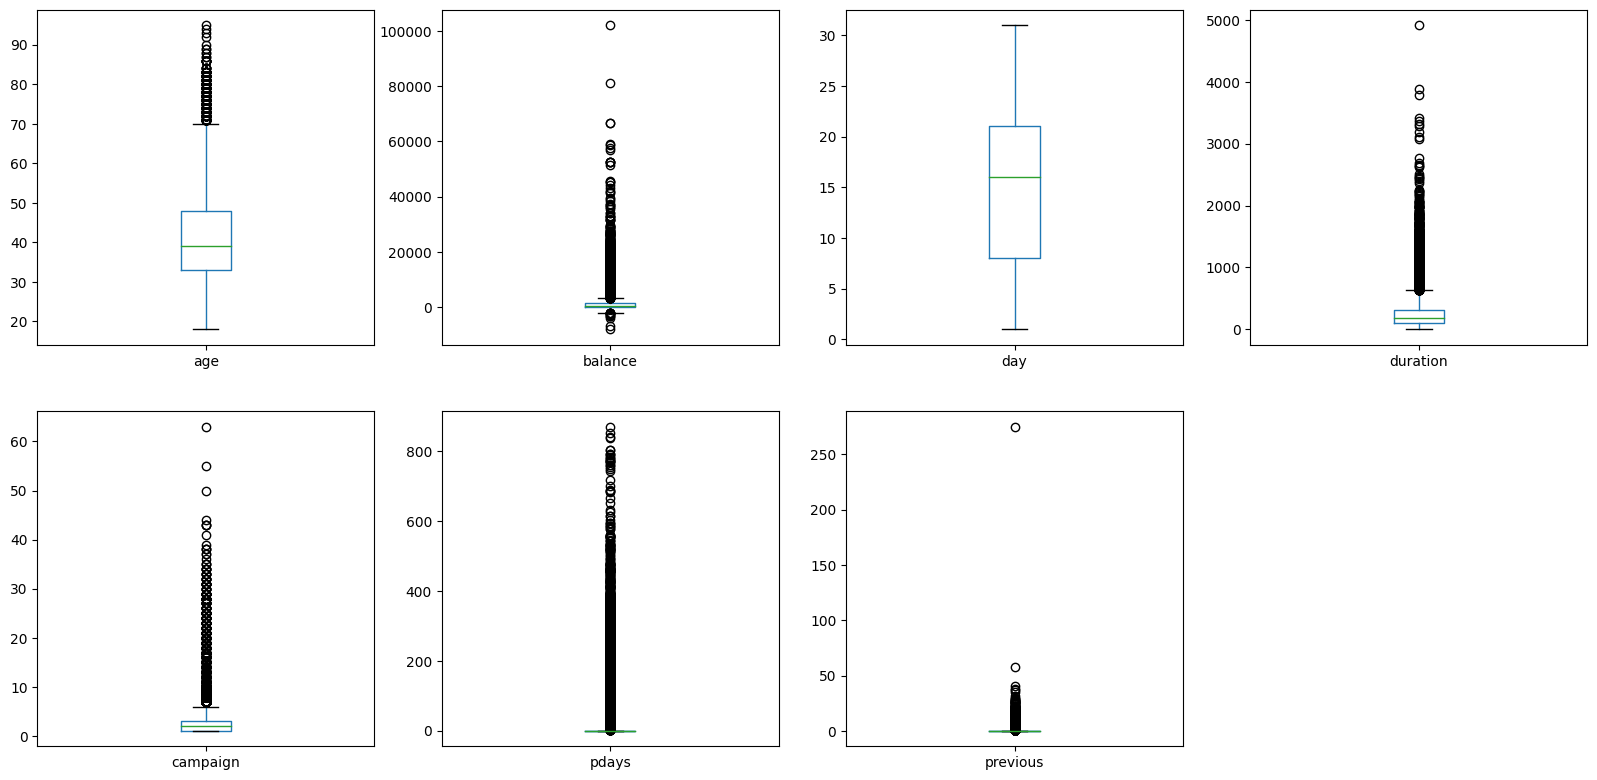

In [ ]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20));

## Understanding Feature Relationships

In [12]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

age   job  marital  education  default  balance  housing  loan  \
0       56  0.00     1.00       3.00     0.00     1933     0.00  0.00   
1       31 11.00     1.00       1.00     0.00        3     0.00  0.00   
2       27  7.00     1.00       1.00     0.00      891     1.00  0.00   
3       57  4.00     0.00       2.00     0.00     3287     0.00  0.00   
4       31  9.00     1.00       1.00     0.00      119     1.00  0.00   
...    ...   ...      ...        ...      ...      ...      ...   ...   
31642   29  4.00     2.00       2.00     0.00        0     1.00  0.00   
31643   53  4.00     0.00       2.00     0.00      380     0.00  1.00   
31644   32  4.00     2.00       2.00     0.00      312     0.00  0.00   
31645   57  9.00     1.00       1.00     0.00      225     1.00  0.00   
31646   55  4.00     0.00       1.00     0.00      204     1.00  0.00   

       contact  day  month  duration  campaign  pdays  previous  poutcome  \
0         1.00   19   9.00        44         2     -1         0      3.00   
1         0.00   20   5.00        91         2     -1         0      3.00   
2         0.00   18   5.00       240         1     -1         0      3.00   
3         0.00   22   6.00       867         1     84         3      2.00   
4         0.00    4   3.00       380         1     -1         0      3.00   
...        ...  ...    ...       ...       ...    ...       ...       ...   
31642     0.00   12   8.00       116         2     -1         0      3.00   
31643     0.00    5   6.00       438         2     -1         0      3.00   
31644     0.00    7   1.00        37         3     -1         0      3.00   
31645     1.00   15   8.00        22         7    337        12      0.00   
31646     0.00   11   5.00      1973         2     -1         0      3.00   

       subscribed  
0            0.00  
1            0.00  
2            0.00  
3            1.00  
4            0.00  
...           ...  
31642        0.00  
31643        1.00  
31644        0.00  
31645        0.00  
31646        1.00  

[31647 rows x 17 columns]

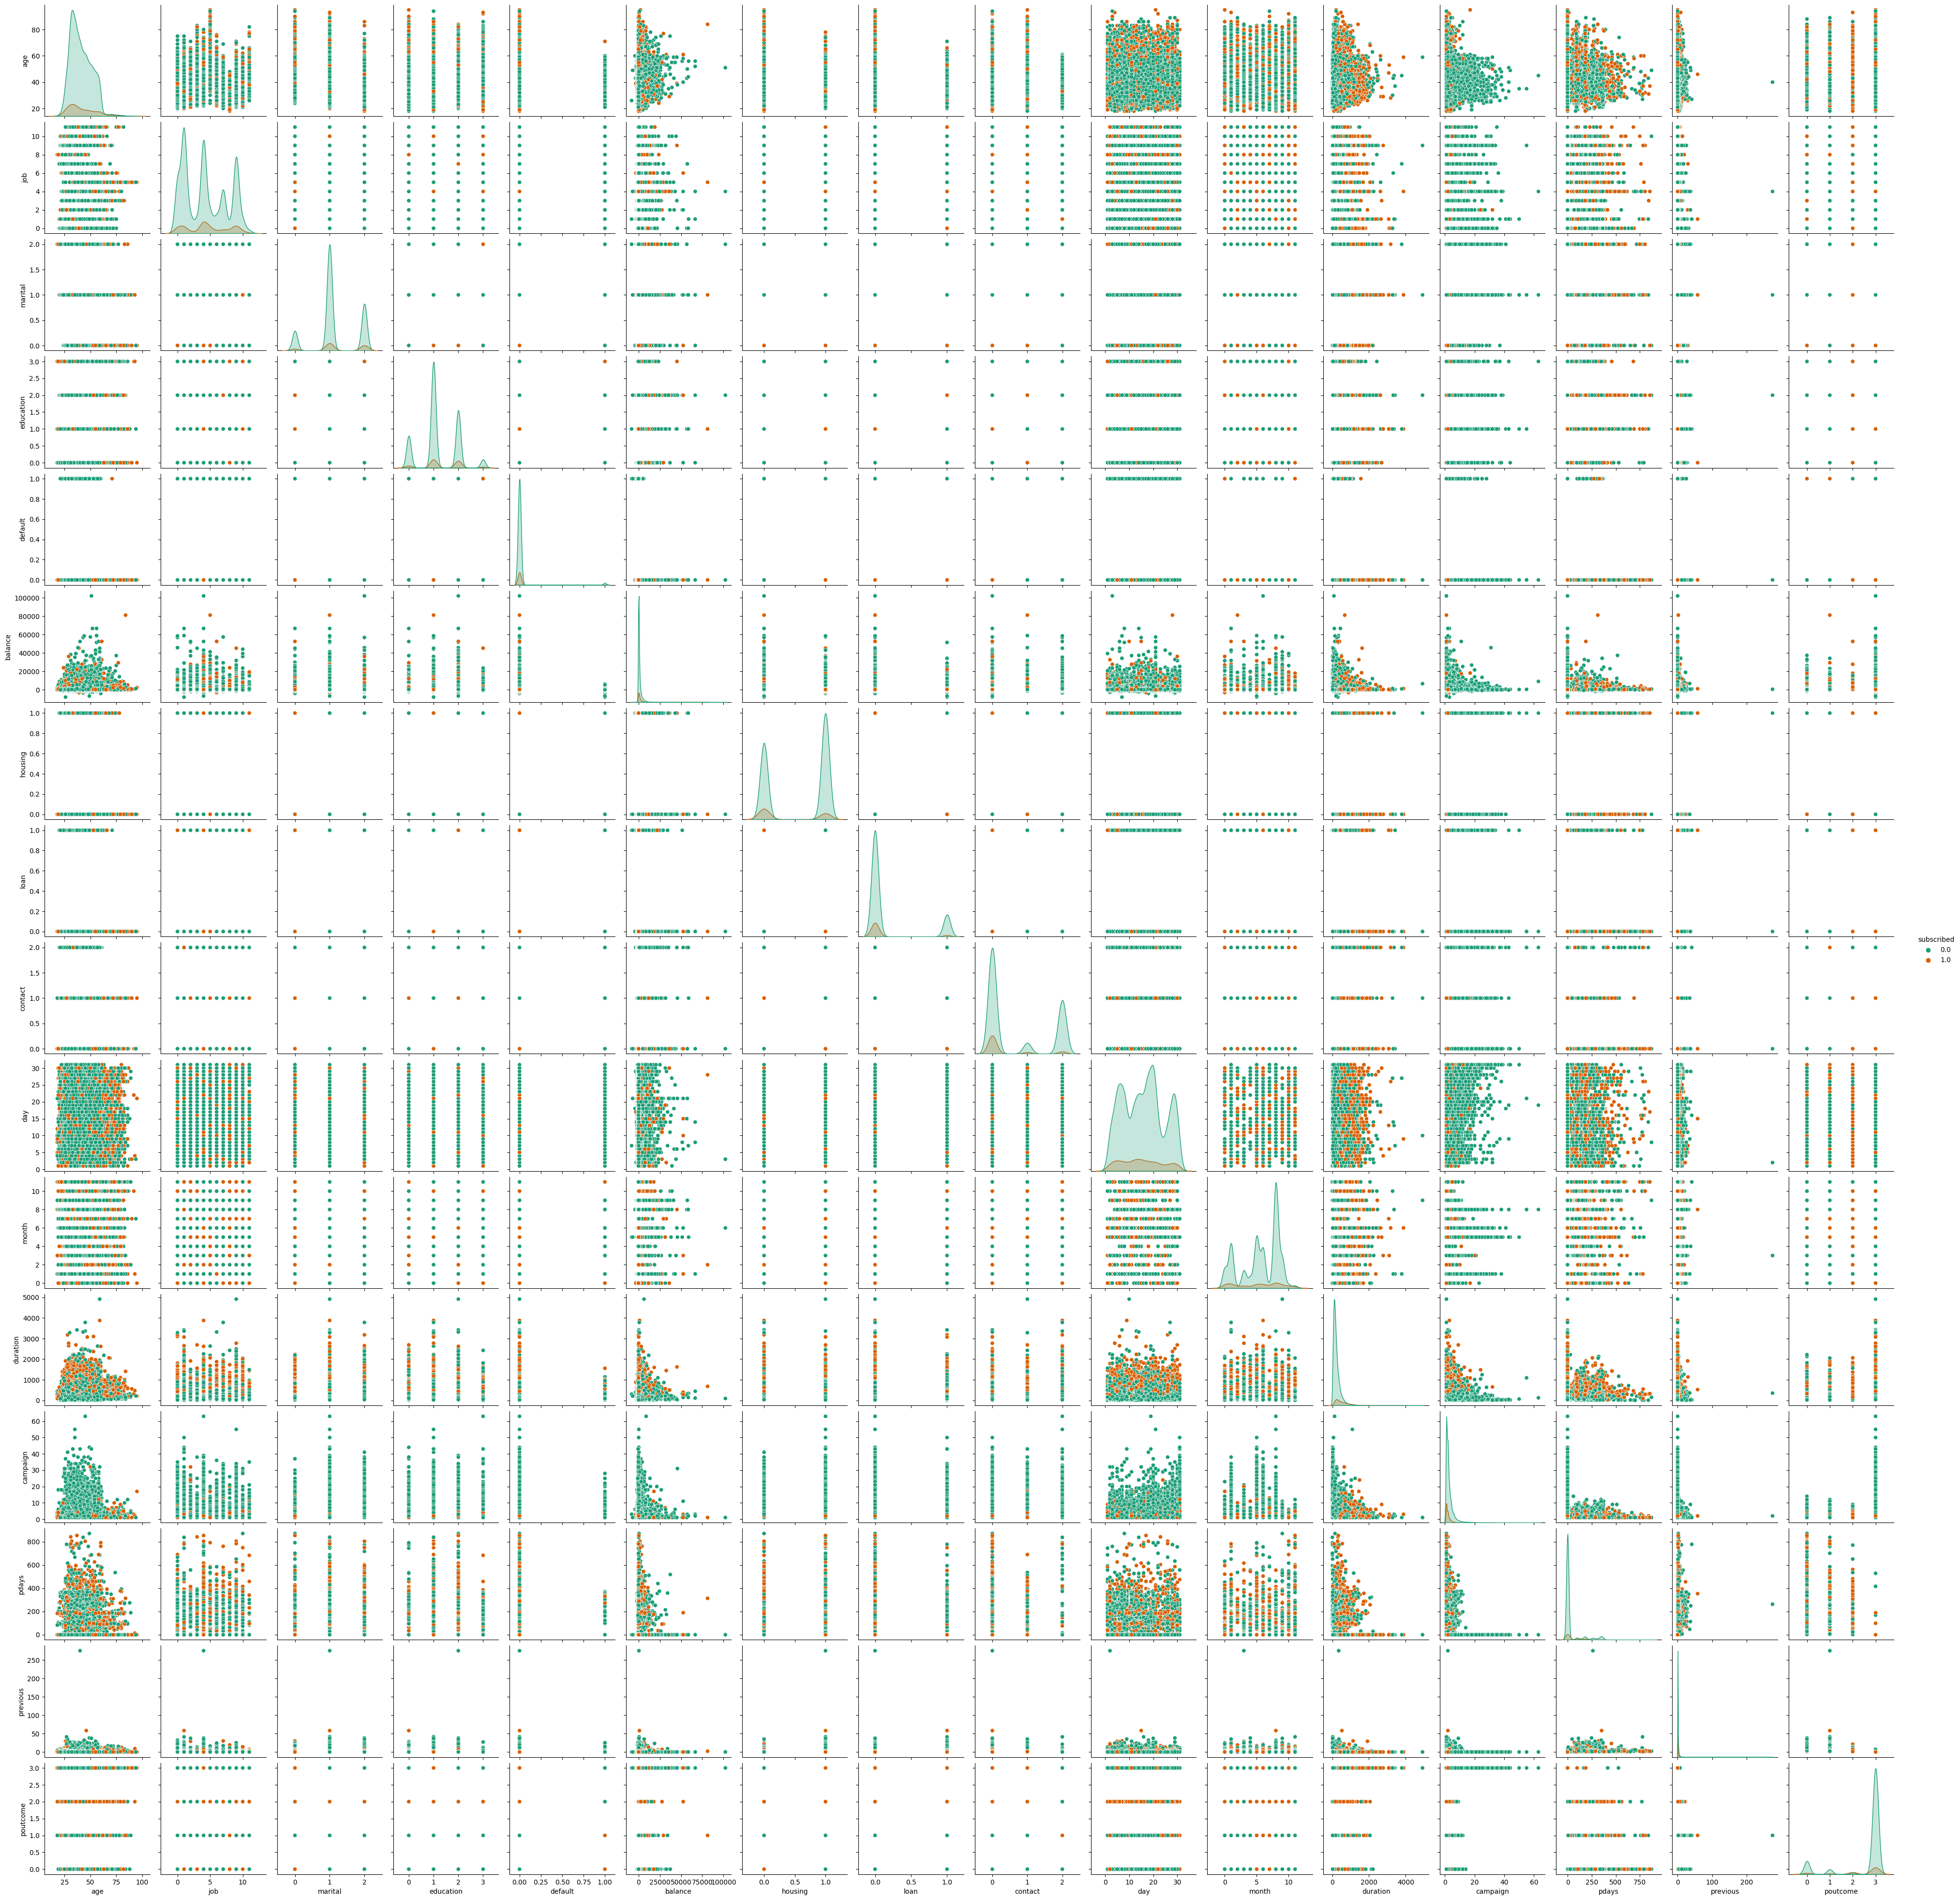

In [ ]:
sns.pairplot(df, palette="Dark2", hue='subscribed');

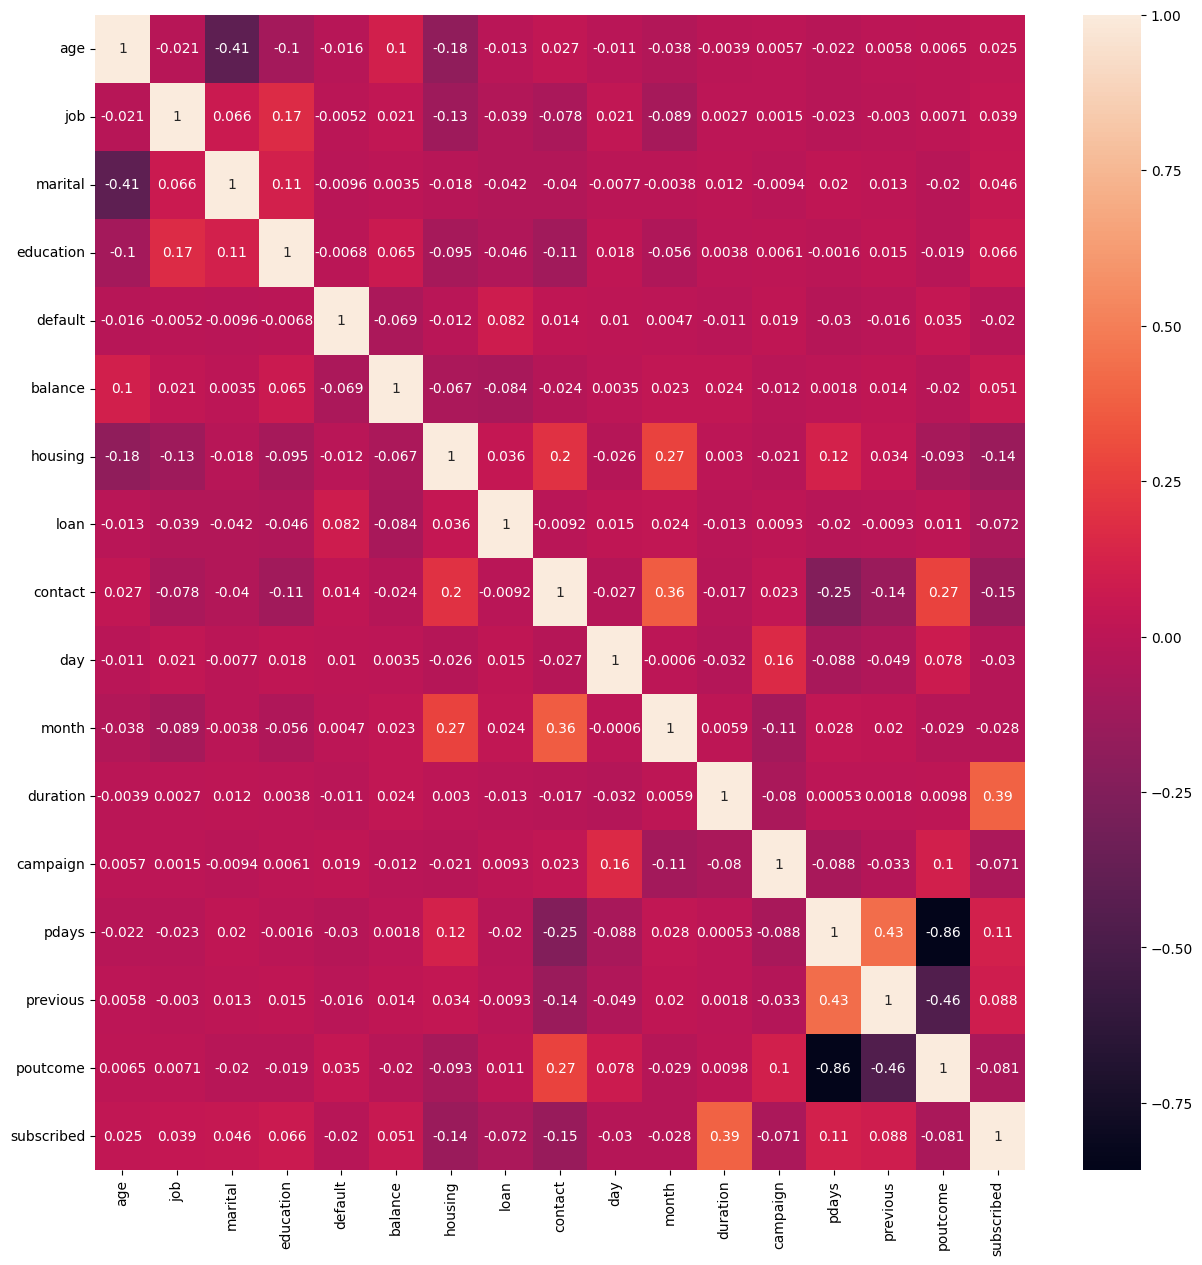

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True);

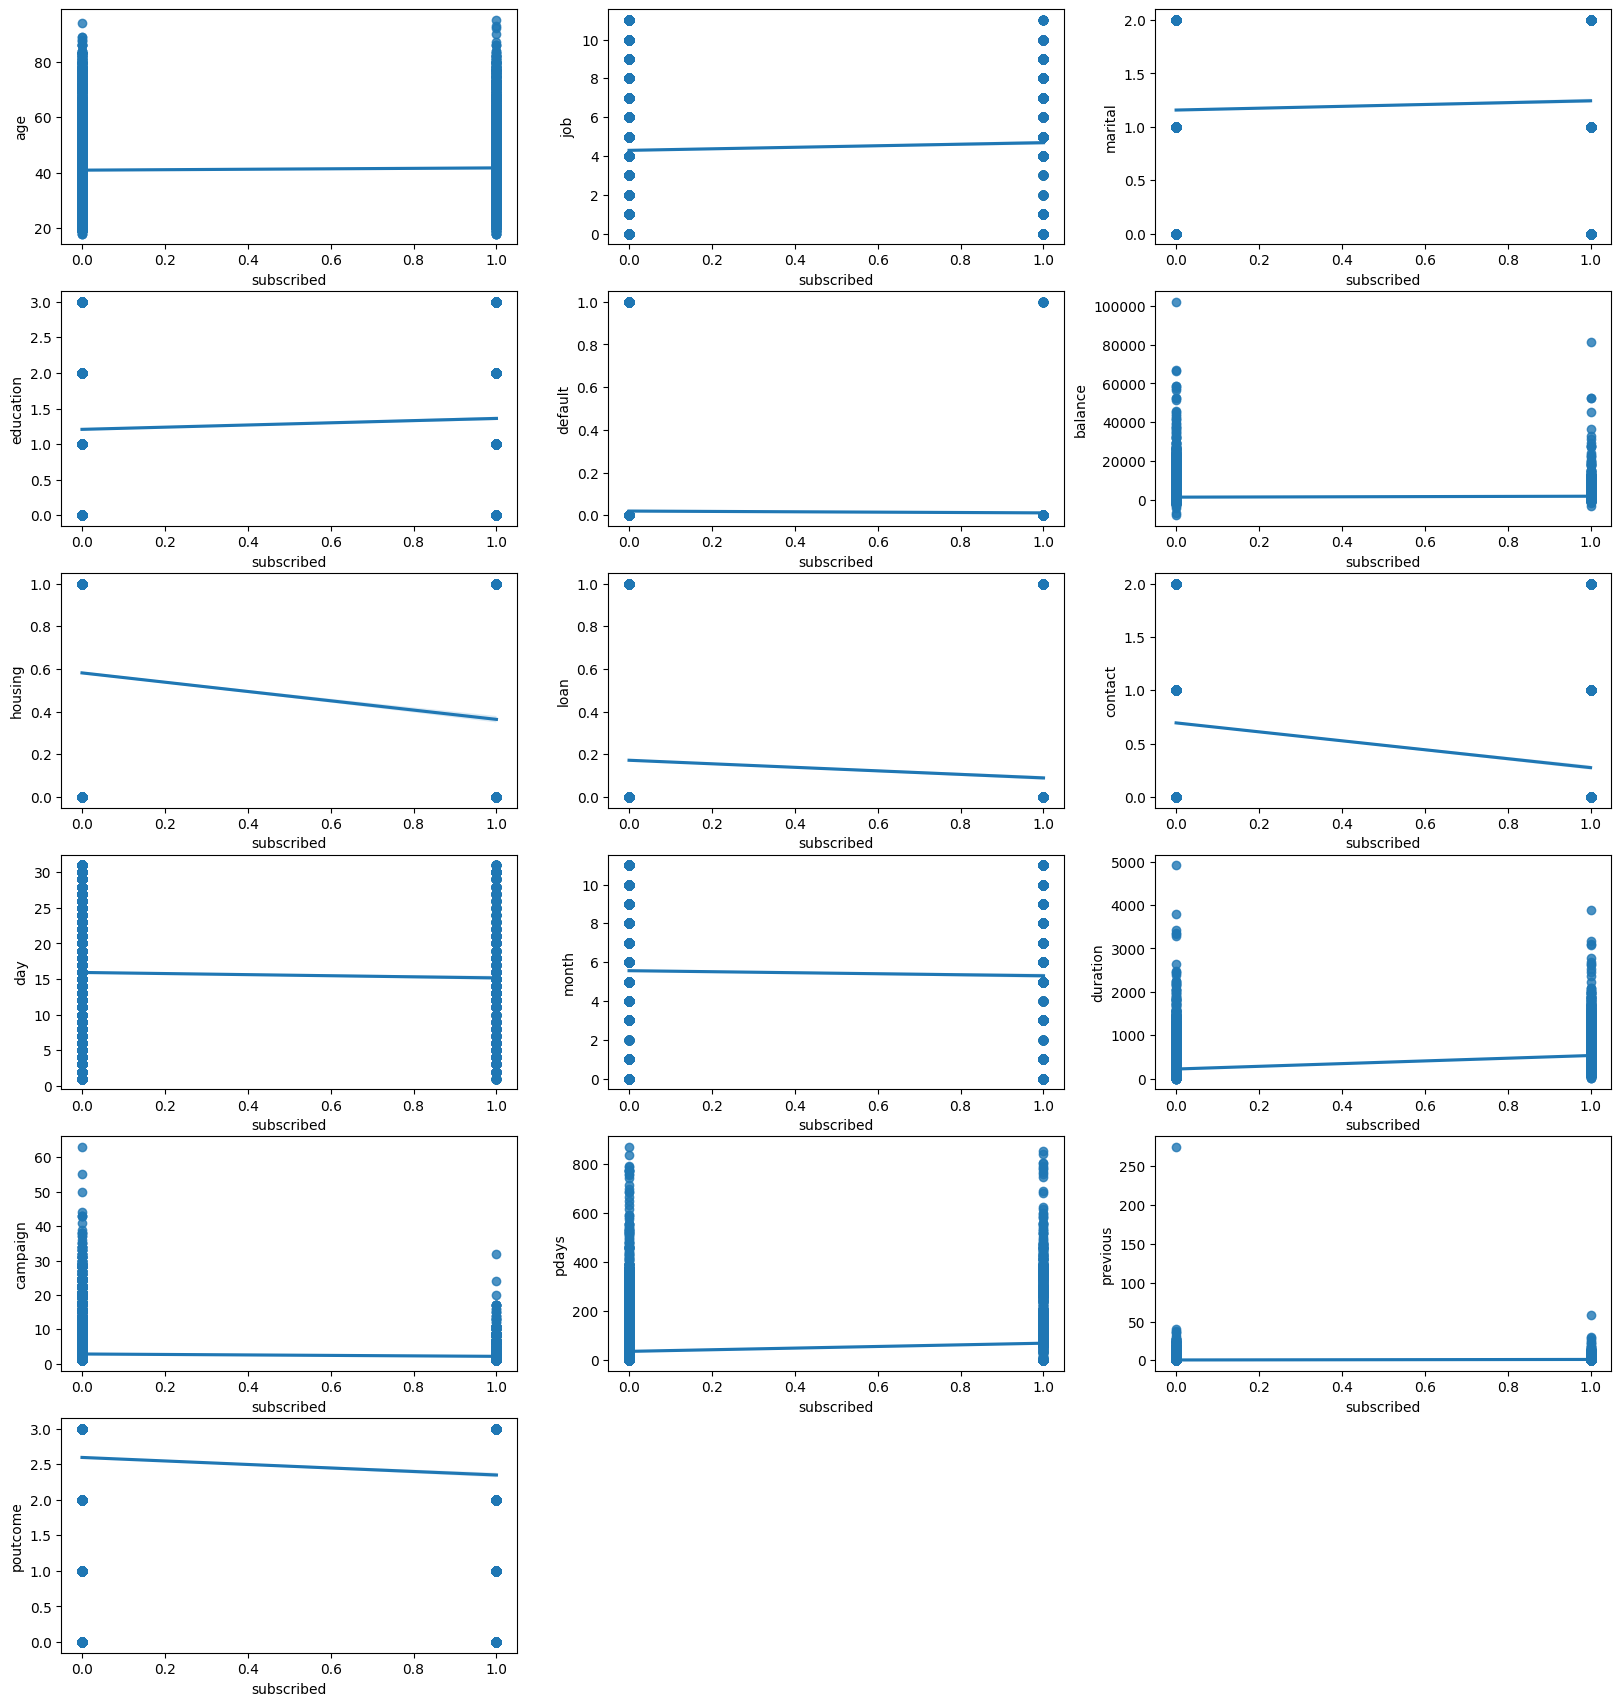

In [ ]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=16:
        plt.subplot(7,3,p)
        sns.regplot(x='subscribed', y=i, data=df)
        plt.xlabel('subscribed')
        plt.ylabel(i)
    p+=1
plt.show()

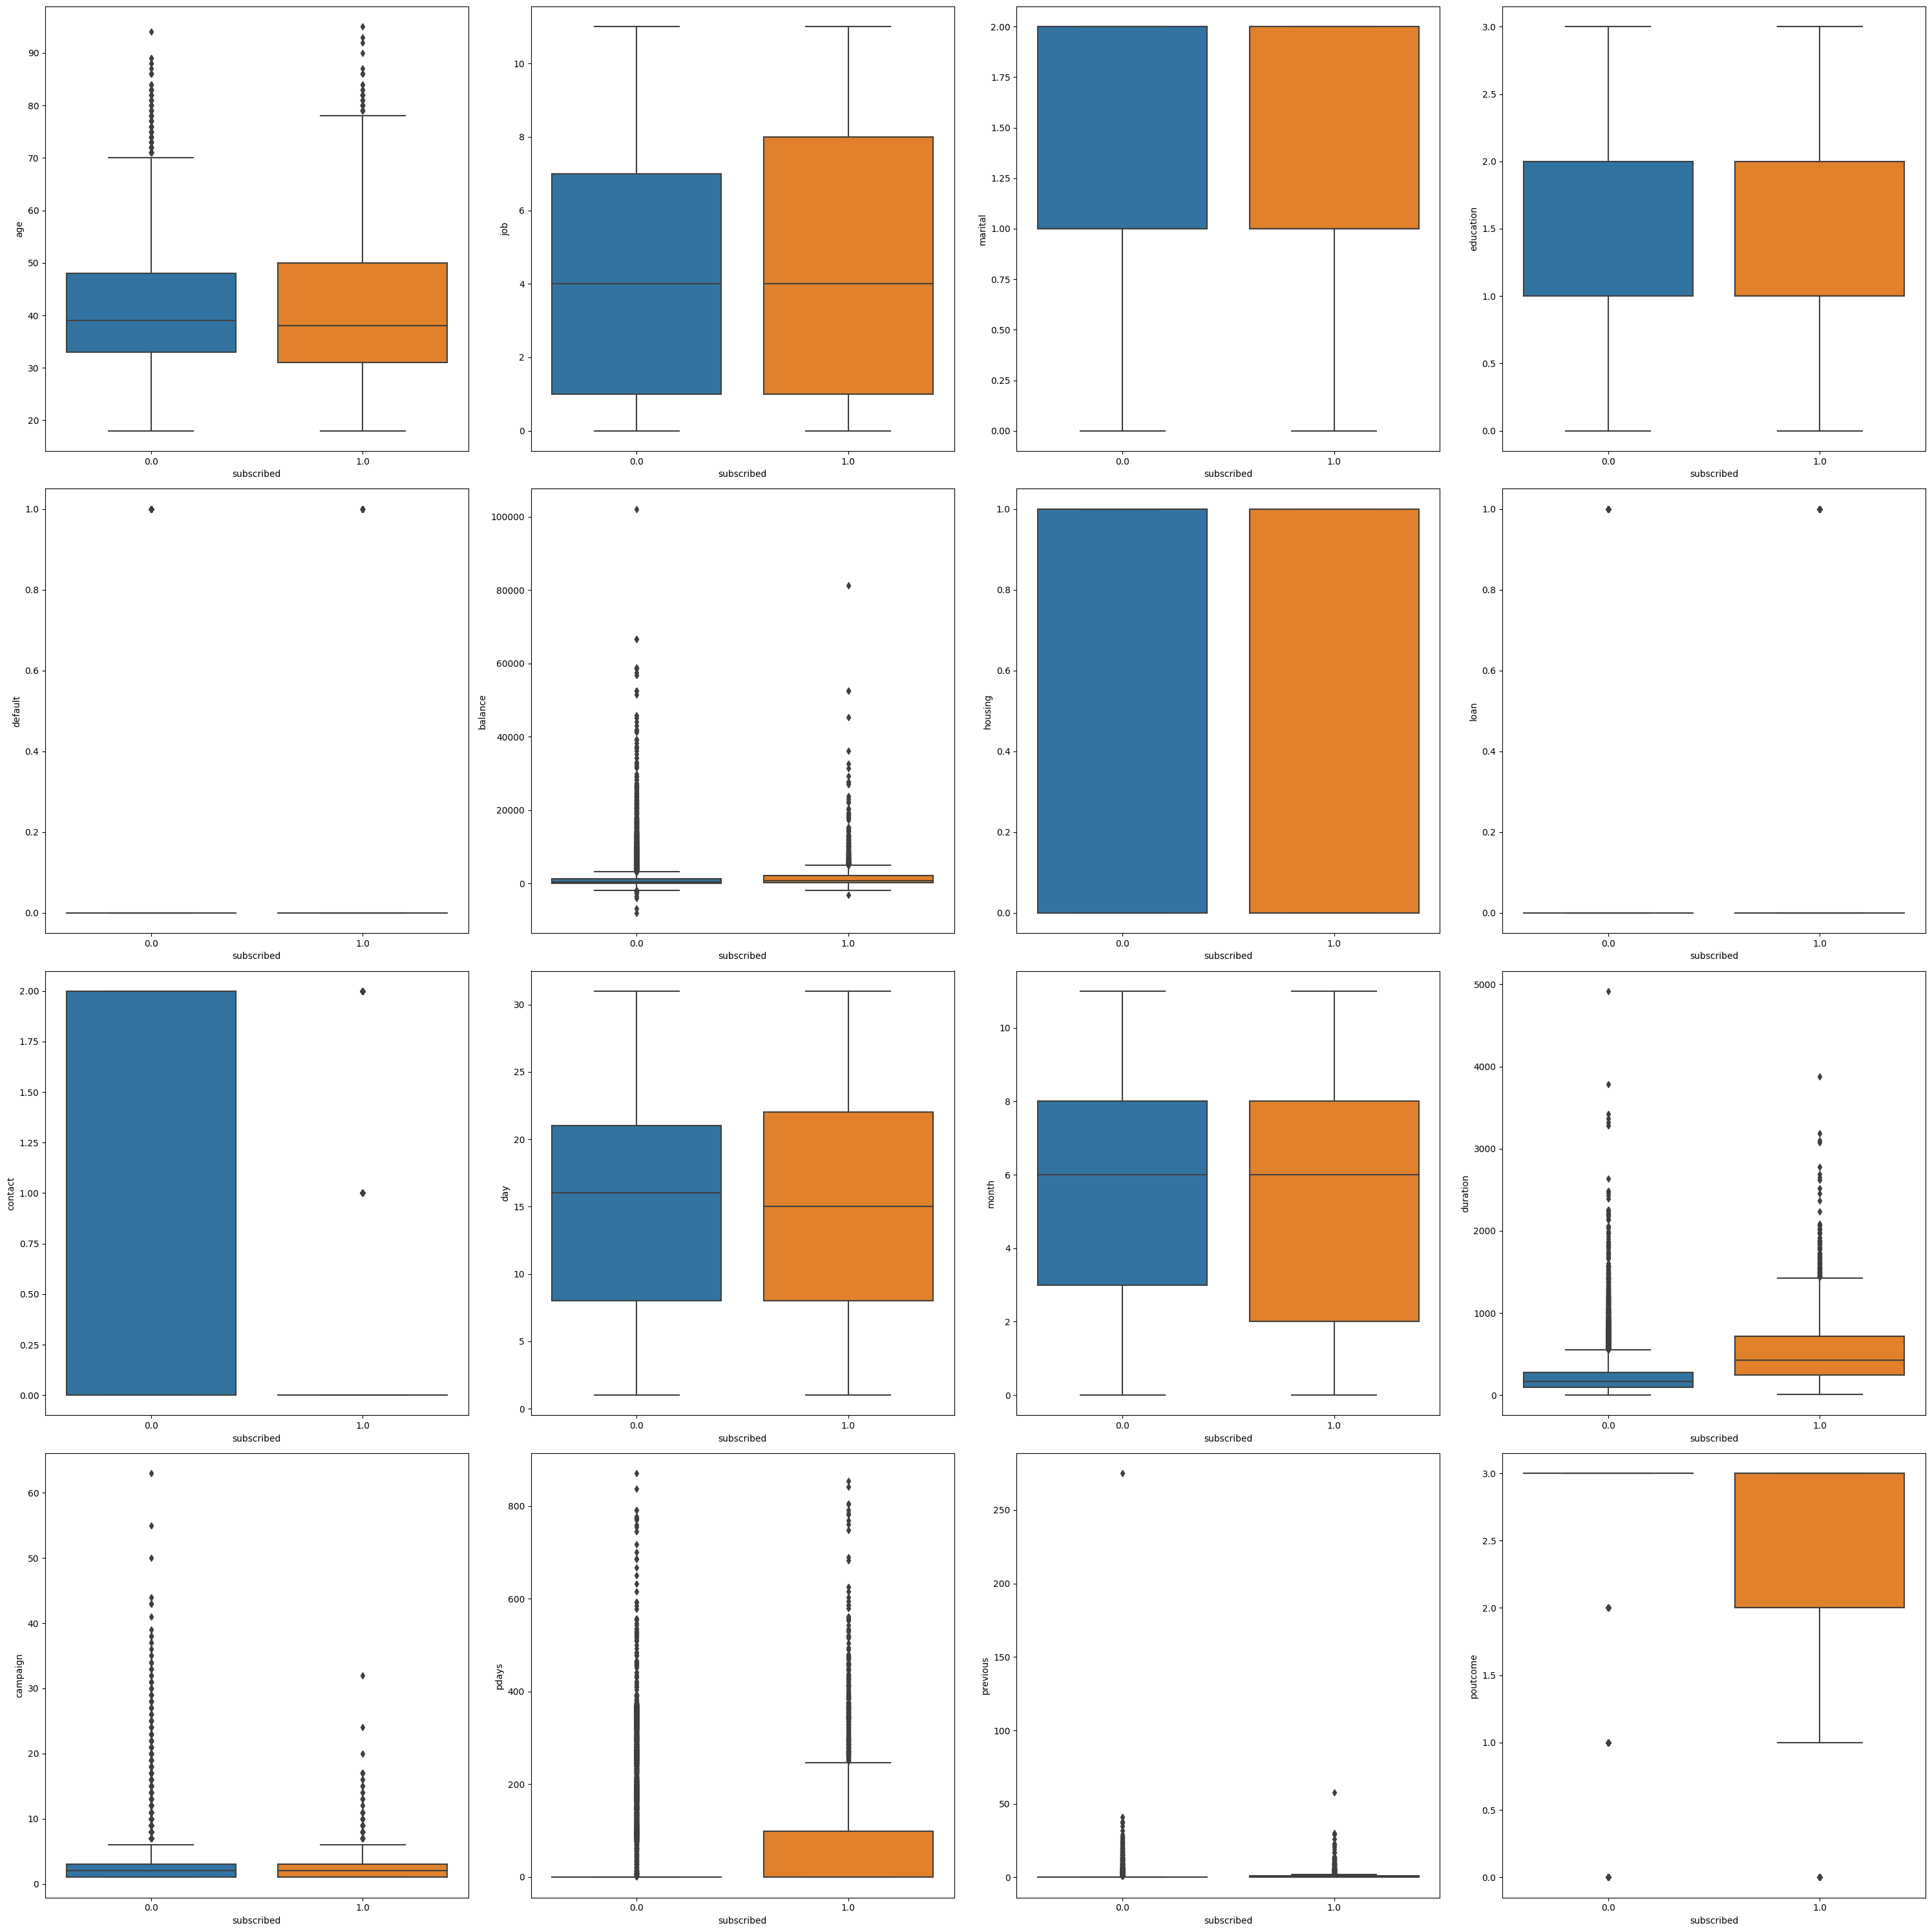

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(30,30))
features = df.drop('subscribed', axis=1).columns
for i, ax in enumerate(axs.flatten()):
    sns.boxplot(x='subscribed', y=features[i], data=df, ax=ax)
plt.tight_layout()
plt.show()

## Model Preparation

In [13]:
df_skew = df.skew()
df_skew

age           0.68
job           0.26
marital      -0.10
education     0.20
default       7.15
balance       8.00
housing      -0.22
loan          1.83
contact       0.76
day           0.09
month        -0.49
duration      3.20
campaign      4.87
pdays         2.64
previous     49.30
poutcome     -2.00
subscribed    2.38
dtype: float64

In [15]:
for index, value in df_skew.iteritems():
    if value > 0.5:
        df[index] = np.cbrt(df[index])
df.skew()

age           0.16
job           0.26
marital      -0.10
education     0.20
default       7.15
balance      -1.87
housing      -0.22
loan          1.83
contact       0.61
day           0.09
month        -0.49
duration     -0.11
campaign      1.11
pdays         1.67
previous      1.70
poutcome     -2.00
subscribed    2.38
dtype: float64

In [16]:
x = df.drop(['subscribed'], axis=1)
y = df[['subscribed']]

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values   Features
0       313.80        age
1         2.89        job
2         4.83    marital
3         3.88  education
4         1.08    default
5         2.95    balance
6         2.53    housing
7         1.23       loan
8         1.99    contact
9         4.78        day
10        5.43      month
11       94.93   duration
12      149.16   campaign
13      112.83      pdays
14       97.23   previous
15       71.38   poutcome

In [18]:
x = x.drop(['poutcome'], axis=1)

In [19]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values   Features
0         1.30        age
1         1.05        job
2         1.25    marital
3         1.06  education
4         1.06    default
5         1.10    balance
6         1.17    housing
7         1.03       loan
8         1.29    contact
9         1.04        day
10        1.25      month
11        1.03   duration
12        1.09   campaign
13       81.09      pdays
14       80.84   previous

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y = smote.fit_resample(x,y)

## Model Creation

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

In [ ]:
#clf = LazyClassifier(verbose = 0, ignore_warnings=True, custom_metric=None)
#models, prediction = clf.fit(xtrain, xtest, ytrain, ytest)
#print(models);

 41%|████▏     | 12/29 [01:26<04:15, 15.02s/it]

KernelInterrupted: Execution interrupted by the Jupyter kernel.

## Model Evaluation

In [23]:
from lightgbm import LGBMClassifier

In [24]:
params = {
'objective': 'binary',
'boosting_type': 'gbdt',
'num_leaves': 31,
'learning_rate': 0.05,
'feature_fraction': 0.9
}

In [25]:
lg_clf = LGBMClassifier(**params)

In [26]:
lg_clf.fit(xtrain,ytrain)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 21001, number of negative: 20897
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 41898, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501241 -> initscore=0.004964
[LightGBM] [Info] Start training from score 0.004964


LGBMClassifier(feature_fraction=0.9, learning_rate=0.05, objective='binary')

In [27]:
from sklearn.metrics import classification_report
pred = lg_clf.predict(xtest)
print(classification_report(ytest, pred))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93      7035
         1.0       0.91      0.94      0.93      6931

    accuracy                           0.93     13966
   macro avg       0.93      0.93      0.93     13966
weighted avg       0.93      0.93      0.93     13966



In [30]:
Final_model = LGBMClassifier(num_leaves=31, min_data_in_leaf=20, max_depth=35)
Final_model.fit(x, y)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 27932, number of negative: 27932
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 55864, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore

LGBMClassifier(max_depth=35, min_data_in_leaf=20)

In [31]:
fpred = Final_model.predict(xtest)
print(classification_report(ytest, fpred))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      7035
         1.0       0.94      0.95      0.95      6931

    accuracy                           0.95     13966
   macro avg       0.95      0.95      0.95     13966
weighted avg       0.95      0.95      0.95     13966



### Run df_test data on Final_model

### 

In [49]:
# Test Data
df_test = df_test.drop(['ID'], axis=1)

In [50]:
# Test Data
df_test_skew = df_test.skew()
df_test_skew

age        0.69
balance    9.17
day        0.11
duration   3.02
campaign   4.96
pdays      2.56
previous   8.70
dtype: float64

In [51]:
# Test Data
OE = OrdinalEncoder()
for i in df_test.columns:
    if df_test[i].dtypes == 'object':
        df_test[i] = OE.fit_transform(df_test[i].values.reshape(-1, 1))
df_test

age  job  marital  education  default  balance  housing  loan  contact  \
0       32 7.00     1.00       1.00     0.00      118     1.00  0.00     0.00   
1       78 5.00     0.00       0.00     0.00     2787     0.00  0.00     1.00   
2       31 6.00     2.00       2.00     0.00      144     1.00  0.00     2.00   
3       57 7.00     2.00       0.00     0.00     3777     1.00  0.00     1.00   
4       45 1.00     0.00       1.00     0.00     -705     0.00  1.00     2.00   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
13559   39 4.00     1.00       2.00     0.00       45     0.00  0.00     0.00   
13560   54 1.00     1.00       0.00     0.00     2281     1.00  0.00     2.00   
13561   35 5.00     1.00       0.00     0.00      285     1.00  0.00     0.00   
13562   29 0.00     2.00       1.00     0.00      464     0.00  0.00     0.00   
13563   29 0.00     1.00       1.00     0.00        2     1.00  0.00     0.00   

       day  month  duration  campaign  pdays  previous  poutcome  
0       15   8.00        20         6     -1         0      3.00  
1        1   5.00       372         1     -1         0      3.00  
2       16   8.00       676         1     -1         0      3.00  
3       13   8.00        65         2     -1         0      3.00  
4        3   5.00       111         1     -1         0      3.00  
...    ...    ...       ...       ...    ...       ...       ...  
13559   28   1.00       148         4     -1         0      3.00  
13560   20   6.00       158         1     -1         0      3.00  
13561   29   4.00       136         1     -1         0      3.00  
13562    9   9.00       208         2     91         3      2.00  
13563    6   8.00       339         1    362         1      0.00  

[13564 rows x 16 columns]

In [52]:
# Test Data
for index, value in df_test_skew.iteritems():
    if value > 0.5:
        df_test[index] = np.cbrt(df_test[index])
df_test.skew()

age          0.29
job          0.25
marital     -0.11
education    0.19
default      7.48
balance     -0.06
housing     -0.23
loan         1.90
contact      0.79
day          0.11
month       -0.47
duration     0.62
campaign     1.62
pdays        1.72
previous     2.01
poutcome    -1.92
dtype: float64

In [53]:
# Test Data
df_testx = df_test.drop(['poutcome'], axis=1)

In [54]:
# Test Data
scaler = preprocessing.StandardScaler()
df_testx = pd.DataFrame(scaler.fit_transform(df_testx), columns = df_testx.columns)

In [69]:
# Test Data
final_pred = Final_model.predict(df_testx)


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [70]:
# print the results of the final model
final_pred = pd.DataFrame(final_pred, columns=['subscribed'])
final_pred

subscribed
0            0.00
1            1.00
2            1.00
3            1.00
4            1.00
...           ...
13559        1.00
13560        1.00
13561        1.00
13562        1.00
13563        1.00

[13564 rows x 1 columns]

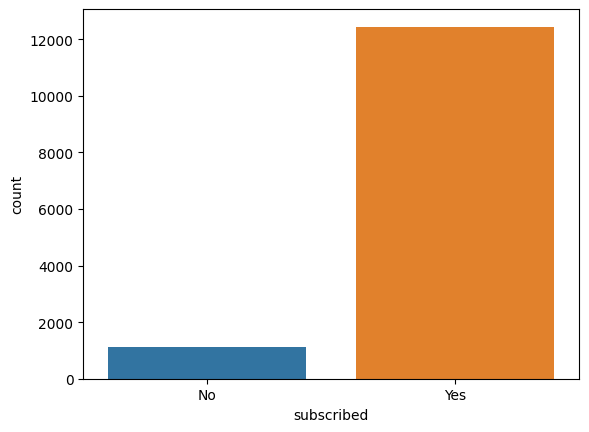

In [79]:
sns.countplot(x='subscribed', data=final_pred)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f99231de-8325-4b7c-85fa-04f28ad6aad7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>